In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Provided Tables/final_df.csv')

In [3]:
df.sample(5)

,Unnamed: 0,subject_id,hadm_id,admittime,dischtime,admission_type,discharge_location,ethnicity,cpt_cd,all_diagnosis,...,drg_type,drg_code,description,drg_severity,drg_mortality,age,next_admittime,days_to_readmit,procedure_pairs,lab_events
12586,12586,79480,156836,2199-05-11 17:14:00,2199-05-15 19:55:00,EMERGENCY,HOME HEALTH CARE,WHITE,"['99291', '99233', '93289', '99222', '99232', ...","7847,4254,5990,2851,42822,4280,42731,E9342,041...",...,APR,983.0,"Other Ear, Nose, Mouth & Throat Procedures",3.0,2.0,78.0,NaN,NaN,"[(1, 2109)]","[(50861, '12', 'normal', 4.102083333333334), (..."
7454,7454,24536,167916,2162-09-10 12:34:00,2162-09-17 16:13:00,EMERGENCY,HOME HEALTH CARE,WHITE,"[99233, 99223, 94003, 94002]","41401,99812,5990,4280,43310,41012,25000,4439,3962",...,HCFA,107.0,CORONARY BYPASS WITH CARDIAC CATHETER,NaN,NaN,71.0,NaN,NaN,"[(1, 3613), (2, 3723), (3, 3615), (4, 3961), (...","[(51221, '32.7', 'abnormal', 6.397916666666666..."
4627,4627,15450,131666,2144-10-28 18:15:00,2144-11-02 15:30:00,ELECTIVE,HOME HEALTH CARE,WHITE,NaN,"41401,4280,25050,25060,41402,4111,412,4439,27801",...,HCFA,527.0,PERCUTANEOUS CARDIOVASCULAR PROCEDURE WITH DRU...,NaN,NaN,61.0,2145-01-05 18:18:00,64.116667,"[(1, 3601), (2, 3607), (3, 3722), (4, 8856), (...","[(50912, '2.5', 'abnormal', 4.895833333333333)..."
4690,4690,15655,133536,2167-05-04 11:00:00,2167-05-15 15:15:00,ELECTIVE,HOME HEALTH CARE,WHITE,['94003'],"41401,4111,9971,42731,4280,4254,496,25000,4019...",...,HCFA,109.0,CORONARY BYPASS WITHOUT CARDIAC CATHETER,NaN,NaN,70.0,NaN,NaN,"[(1, 3615), (2, 3614), (3, 3961), (4, 9961), (...","[(50818, '34', 'abnormal', 10.002083333333333)..."
7789,7789,25550,163669,2177-11-08 01:07:00,2177-11-28 13:10:00,EMERGENCY,REHAB/DISTINCT PART HOSP,WHITE,"[99231, 99254, 99232, 99261, 99233, 99222, '94...","41401,4111,4280,42732,496,4271,42830,7530,56210",...,HCFA,108.0,OTHER CARDIOTHORACIC PROCEDURES,NaN,NaN,69.0,NaN,NaN,"[(1, 3733), (2, 3611), (3, 3723), (4, 8856), (...","[(51006, '23', 'abnormal', 14.28125), (51221, ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14040 entries, 0 to 14039
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14040 non-null  int64  
 1   subject_id          14040 non-null  int64  
 2   hadm_id             14040 non-null  int64  
 3   admittime           14040 non-null  object 
 4   dischtime           14040 non-null  object 
 5   admission_type      14040 non-null  object 
 6   discharge_location  14040 non-null  object 
 7   ethnicity           14040 non-null  object 
 8   cpt_cd              12806 non-null  object 
 9   all_diagnosis       14040 non-null  object 
 10  gender              14040 non-null  object 
 11  dob                 14040 non-null  object 
 12  dod                 8641 non-null   object 
 13  drg_type            14038 non-null  object 
 14  drg_code            14038 non-null  float64
 15  description         14038 non-null  object 
 16  drg_

In [5]:
df = df[['admission_type',
        'discharge_location',
        'ethnicity',
        'cpt_cd',
        'all_diagnosis',
        'gender',
        'drg_type',
        'drg_code',
        'description',
        'drg_severity',
        'drg_mortality',
        'age',
        'procedure_pairs',
        'lab_events',
        'days_to_readmit']]

In [6]:
df.sample(5)

,admission_type,discharge_location,ethnicity,cpt_cd,all_diagnosis,gender,drg_type,drg_code,description,drg_severity,drg_mortality,age,procedure_pairs,lab_events,days_to_readmit
10711,EMERGENCY,LONG TERM CARE HOSPITAL,WHITE,"['99291', '99292', '99233', '99222', 94003]","0389,78552,34839,51881,42833,2760,5990,2639,28...",F,APR,7204.0,Septicemia & Disseminated Infections,4.0,4.0,77.0,"[(1, 9671), (2, 3891), (3, 9604), (4, 9608), (...","[(50983, '160', 'abnormal', 12.611805555555556...",NaN
11333,EMERGENCY,LONG TERM CARE HOSPITAL,WHITE,"[99291, 99233, 36556, 76937, 99232, 99239]","03819,1125,78552,00845,5849,42832,2762,2761,99...",F,APR,7204.0,Septicemia & Disseminated Infections,4.0,4.0,85.0,"[(1, 3893), (2, 9904)]","[(51277, '16.5', 'abnormal', 1.463194444444444...",5.179861
3840,EMERGENCY,REHAB/DISTINCT PART HOSP,WHITE,NaN,"4280,42731,4240,4271,99812,41402,V1005,V4501,2...",M,HCFA,127.0,HEART FAILURE & SHOCK,NaN,NaN,NaN,"[(1, 8964)]","[(51237, '1.6', 'normal', 5.365277777777778), ...",733.175694
8051,EMERGENCY,DEAD/EXPIRED,WHITE,"[99223, 99291, '94002']","51884,1975,1977,5859,5990,4280,5849,70705,V450...",F,APR,1334.0,Pulmonary Edema & Respiratory Failure,4.0,4.0,NaN,NaN,"[(50868, '14', 'normal', 2.3402777777777777), ...",NaN
11662,EMERGENCY,HOME HEALTH CARE,WHITE,NaN,"41011,42821,4280,41401,4142,4168,4588,25639,27...",F,APR,1743.0,Percutaneous Cardiovascular Procedures w/ AMI,3.0,3.0,86.0,"[(1, 66), (2, 3606), (3, 40), (4, 45), (5, 372...","[(50861, '30', 'normal', 5.347916666666666), (...",NaN


In [7]:
df.shape

(14040, 15)

In [8]:
df['days_to_readmit'].isnull().sum()

9680

In [9]:
df.describe()

,drg_code,drg_severity,drg_mortality,age,days_to_readmit
count,14038.000000,9756.000000,9756.000000,12697.000000,4360.000000
mean,2006.806668,3.477757,3.277060,69.743955,301.284445
std,2201.576128,0.639401,0.756595,13.084713,523.787013
min,1.000000,1.000000,1.000000,0.000000,-18.765278
25%,416.000000,3.000000,3.000000,62.000000,14.279514
50%,1633.000000,4.000000,3.000000,72.000000,65.049306
75%,2072.000000,4.000000,4.000000,80.000000,348.368576
max,9524.000000,4.000000,4.000000,110.000000,3969.602778


# Data Preprocessing

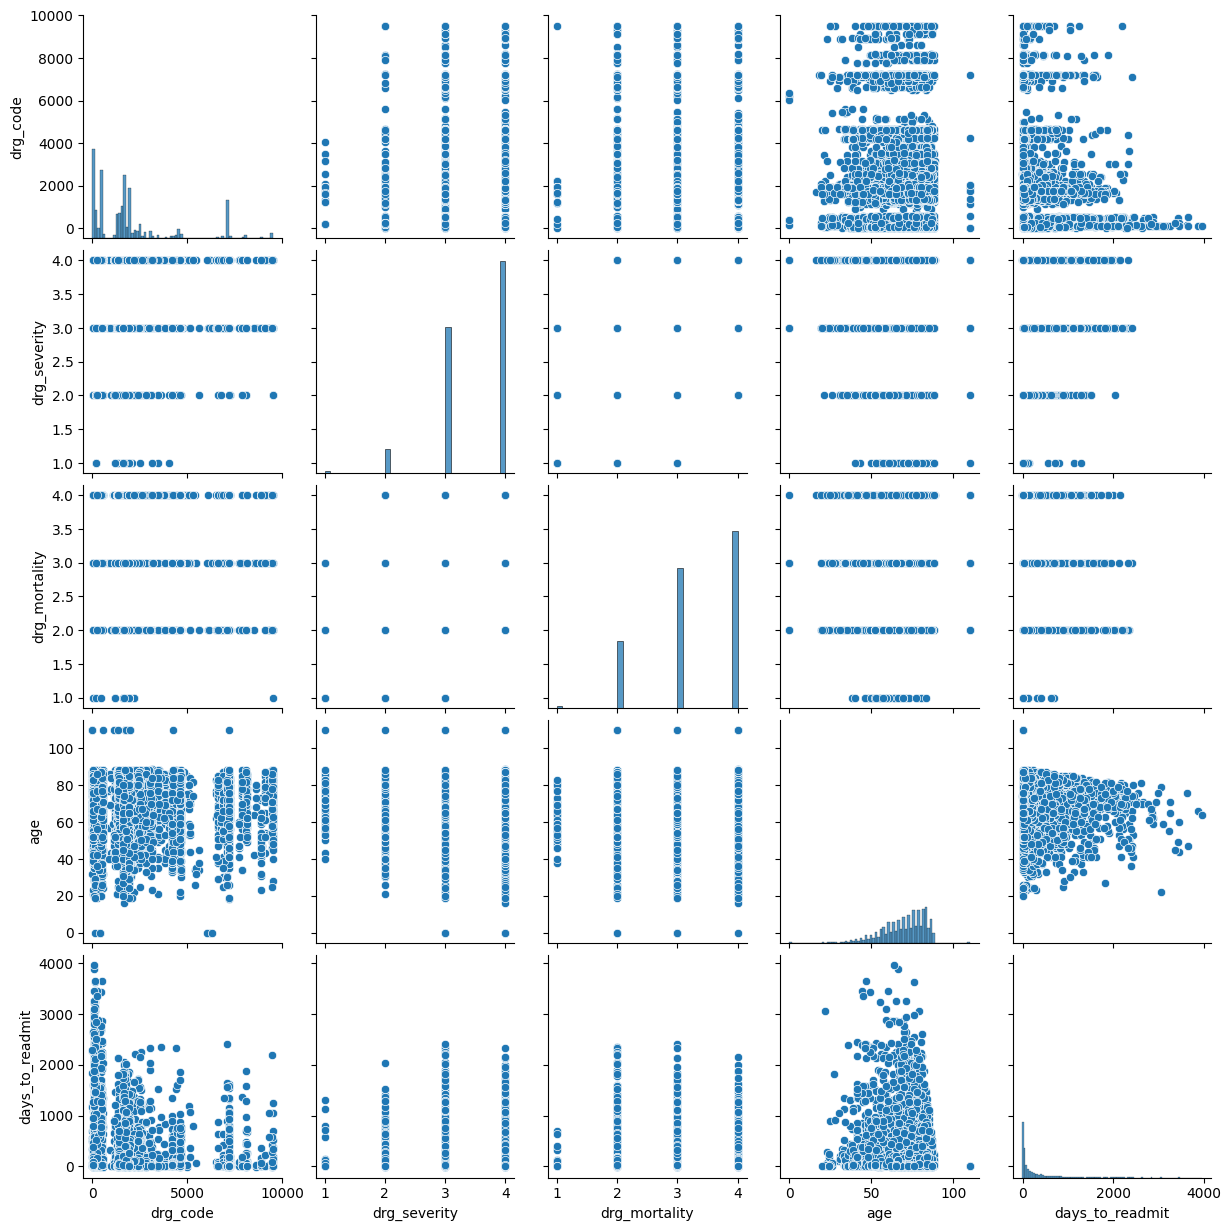

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
#fixing days_to_readmit for negative values
df[df['days_to_readmit'] < 0].shape

(63, 15)

In [12]:
#Removing these 65 rows
df = df[(df['days_to_readmit'].isna()) | (df['days_to_readmit'] >= 0)]

In [13]:
df['readmit_within_30'] = df['days_to_readmit'].apply(lambda x: 1 if pd.notna(x) and x < 30 else 0)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/3559373028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readmit_within_30'] = df['days_to_readmit'].apply(lambda x: 1 if pd.notna(x) and x < 30 else 0)


In [14]:
df.sample(5)

,admission_type,discharge_location,ethnicity,cpt_cd,all_diagnosis,gender,drg_type,drg_code,description,drg_severity,drg_mortality,age,procedure_pairs,lab_events,days_to_readmit,readmit_within_30
12004,EMERGENCY,SNF,WHITE,"['0257T', '99233', '99232', '99222', 94003, 94...","4241,2761,42832,9971,7885,4168,7220,43310,4280...",F,APR,1753.0,Percutaneous Cardiovascular Procedures w/o AMI,3.0,3.0,NaN,"[(1, 3505), (2, 3722), (3, 3964)]","[(51248, '30.5', 'normal', 0.3423611111111111)...",160.029167,0
8673,EMERGENCY,SNF,WHITE,"['99291', '99232', '99239']","41071,5849,42831,4280,412,42731,3962,2948,2387...",F,APR,1903.0,Acute Myocardial Infarction,3.0,4.0,NaN,NaN,"[(51087, 'RANDOM', 'normal', 5.036111111111111...",NaN,0
2955,EMERGENCY,REHAB/DISTINCT PART HOSP,WHITE,NaN,"85220,486,99702,4280,E8859,53081,49390,73300,4019",F,HCFA,1.0,"CRANIOTOMY AGE >17 WITH COMPLICATIONS, COMORBI...",NaN,NaN,NaN,"[(1, 131)]","[(51146, '0.8', 'normal', 8.092361111111112), ...",NaN,0
11832,ELECTIVE,SNF,WHITE,"['99291', '99231', '33405']","4280,5990,4241,2875,4019,42731,4168,3331,V4365...",F,APR,1633.0,Cardiac Valve Procedures w/o Cardiac Catheteri...,3.0,3.0,80.0,"[(1, 3522), (2, 3961)]","[(50813, '0.9', 'normal', 5.28125), (50818, '4...",NaN,0
5589,EMERGENCY,HOME,UNKNOWN/NOT SPECIFIED,NaN,"41401,4280,42731,42781,4111,41042,4019,2720",M,HCFA,109.0,CORONARY BYPASS WITHOUT CARDIAC CATHETER,NaN,NaN,73.0,"[(1, 3615), (2, 3614), (3, 3961), (4, 3783), (...","[(51278, 'NORMAL', 'normal', 14.66597222222222...",NaN,0


In [15]:
df.isnull().sum()

admission_type           0
discharge_location       0
ethnicity                0
cpt_cd                1231
all_diagnosis            0
gender                   0
drg_type                 2
drg_code                 2
description              2
drg_severity          4260
drg_mortality         4260
age                   1334
procedure_pairs       1536
lab_events             122
days_to_readmit       9680
readmit_within_30        0
dtype: int64

In [16]:
#dropping null values with percentage < 1%
df.dropna(subset=['drg_type', 'drg_code','description','lab_events'], inplace=True)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/4133945918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['drg_type', 'drg_code','description','lab_events'], inplace=True)


In [17]:
#Writing no_procedure as string inside the columns having plain code
df['cpt_cd'] = df['cpt_cd'].fillna('no cpt_cd code')
df['procedure_pairs'] = df['procedure_pairs'].fillna('no procedure')

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/1272969866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cpt_cd'] = df['cpt_cd'].fillna('no cpt_cd code')
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/1272969866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['procedure_pairs'] = df['procedure_pairs'].fillna('no procedure')


In [18]:
df['age'].skew()

-0.9192072292405774

In [19]:
#As data is skewed for age
df['age'].fillna(df['age'].median(), inplace=True)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/2293443226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/2293443226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].median(), inp

In [20]:
df['drg_mortality'].fillna(df['drg_mortality'].mode()[0], inplace=True)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/1951132780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['drg_mortality'].fillna(df['drg_mortality'].mode()[0], inplace=True)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/1951132780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drg_mortality']

In [21]:
df['drg_severity'].fillna(df['drg_severity'].mode()[0], inplace=True)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/445200730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['drg_severity'].fillna(df['drg_severity'].mode()[0], inplace=True)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/445200730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drg_severity'].fill

<h2>Admission_type</h2>

In [22]:
df['admission_type'].value_counts()

admission_type
EMERGENCY    12008
ELECTIVE      1430
URGENT         403
NEWBORN         13
Name: count, dtype: int64

In [23]:
df['admission_type'] = df['admission_type'].replace('URGENT','EMERGENCY')

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/1415934956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['admission_type'] = df['admission_type'].replace('URGENT','EMERGENCY')


In [24]:
df['admission_type'].value_counts()

admission_type
EMERGENCY    12411
ELECTIVE      1430
NEWBORN         13
Name: count, dtype: int64

In [25]:
df['admission_type'].isna().sum()

0

In [26]:
#df['admission_type'] = df['admission_type'].map(admission_map)

In [27]:
df['admission_type'].value_counts()

admission_type
EMERGENCY    12411
ELECTIVE      1430
NEWBORN         13
Name: count, dtype: int64

<h3>discharge location</h3>

In [28]:
df['discharge_location'].isna().sum()

0

In [29]:
df['discharge_location'].value_counts()

discharge_location
HOME HEALTH CARE             3483
SNF                          3146
DEAD/EXPIRED                 2021
REHAB/DISTINCT PART HOSP     2010
HOME                         1837
LONG TERM CARE HOSPITAL       856
SHORT TERM HOSPITAL           134
DISC-TRAN CANCER/CHLDRN H     126
HOSPICE-HOME                  118
LEFT AGAINST MEDICAL ADVI      40
HOSPICE-MEDICAL FACILITY       36
ICF                            13
DISCH-TRAN TO PSYCH HOSP       12
HOME WITH HOME IV PROVIDR      11
OTHER FACILITY                  8
DISC-TRAN TO FEDERAL HC         3
Name: count, dtype: int64

In [30]:
#category encoding discharge loc column
'''
import category_encoders as ce

tar_enc_discLoc = ce.TargetEncoder(cols=['discharge_location'])

df['discharge_location_encoded'] = tar_enc_discLoc.fit_transform(df['discharge_location'], df['readmit_within_30'])

df.drop(columns=['discharge_location'],inplace=True)
'''

"\nimport category_encoders as ce\n\ntar_enc_discLoc = ce.TargetEncoder(cols=['discharge_location'])\n\ndf['discharge_location_encoded'] = tar_enc_discLoc.fit_transform(df['discharge_location'], df['readmit_within_30'])\n\ndf.drop(columns=['discharge_location'],inplace=True)\n"

<h3>ethnicity</h3>

In [31]:
df['ethnicity'].isna().sum()

0

In [32]:
df['ethnicity'].value_counts()

ethnicity
WHITE                                                       9981
BLACK/AFRICAN AMERICAN                                      1437
UNKNOWN/NOT SPECIFIED                                       1087
HISPANIC OR LATINO                                           293
OTHER                                                        229
UNABLE TO OBTAIN                                             165
ASIAN                                                        149
PATIENT DECLINED TO ANSWER                                   108
WHITE - RUSSIAN                                               82
HISPANIC/LATINO - PUERTO RICAN                                61
ASIAN - CHINESE                                               36
BLACK/CAPE VERDEAN                                            31
ASIAN - ASIAN INDIAN                                          25
BLACK/HAITIAN                                                 20
PORTUGUESE                                                    18
WHITE - OTHER E

In [33]:
# merging values for <100 in others
eth_counts = df['ethnicity'].value_counts()
categories_to_replace = eth_counts[eth_counts < 100].index
df['ethnicity'] = df['ethnicity'].replace(categories_to_replace, 'OTHER')

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/2903370387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ethnicity'] = df['ethnicity'].replace(categories_to_replace, 'OTHER')


In [34]:
df['ethnicity'].value_counts()

ethnicity
WHITE                         9981
BLACK/AFRICAN AMERICAN        1437
UNKNOWN/NOT SPECIFIED         1087
OTHER                          634
HISPANIC OR LATINO             293
UNABLE TO OBTAIN               165
ASIAN                          149
PATIENT DECLINED TO ANSWER     108
Name: count, dtype: int64

In [35]:
#category encoding ethnicity column
'''
tar_enc_eth = ce.TargetEncoder(cols=['ethnicity'])

df['ethnicity_encoded'] = tar_enc_eth.fit_transform(df['ethnicity'], df['readmit_within_30'])

df.drop(columns=['ethnicity'],inplace=True)
'''

"\ntar_enc_eth = ce.TargetEncoder(cols=['ethnicity'])\n\ndf['ethnicity_encoded'] = tar_enc_eth.fit_transform(df['ethnicity'], df['readmit_within_30'])\n\ndf.drop(columns=['ethnicity'],inplace=True)\n"

<h3>gender</h3>

In [36]:
'''
map = {'M' : 0, 'F' : 1}
df['gender'] = df['gender'].replace(map)
'''

"\nmap = {'M' : 0, 'F' : 1}\ndf['gender'] = df['gender'].replace(map)\n"

<h3>drg_type</h3>

In [37]:
df['drg_type'].value_counts()

drg_type
APR     9702
HCFA    4152
Name: count, dtype: int64

In [38]:
'''
map = {'APR' : 1, 'HCFA' : 0}
df['drg_type'] = df['drg_type'].replace(map)
'''

"\nmap = {'APR' : 1, 'HCFA' : 0}\ndf['drg_type'] = df['drg_type'].replace(map)\n"

<h3>CPTCD</h3>

In [39]:
df['cpt_cd']

0                                       ['94002', '94003']
1                                                ['94003']
2        [99255, 99292, 99291, 99231, 90935, 99232, 909...
3                                           [99223, 99231]
4                                           no cpt_cd code
                               ...                        
14035          ['36556', '99291', '99232', '33465', 94002]
14036                                            ['99291']
14037                 ['99223', '99232', '99233', '99239']
14038    ['99291', '49002', '45300', '44213', '44204', ...
14039    ['99231', '99291', '99232', '99222', '76937', ...
Name: cpt_cd, Length: 13854, dtype: object

In [40]:
# function to preprocess these codes
import string
exclude=string.punctuation.replace(',', '')
def remove_punc(text):
    text = text.lower()
    return text.translate(str.maketrans('','',exclude))

In [41]:
df['cpt_cd'] = df['cpt_cd'].apply(remove_punc)
df['all_diagnosis'] = df['all_diagnosis'].apply(remove_punc)
df['description'] = df['description'].apply(remove_punc)
df['procedure_pairs'] = df['procedure_pairs'].apply(remove_punc)
df['lab_events'] = df['lab_events'].apply(remove_punc)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/3978410195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cpt_cd'] = df['cpt_cd'].apply(remove_punc)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/3978410195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_diagnosis'] = df['all_diagnosis'].apply(remove_punc)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_2379/3978410195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [42]:
df

,admission_type,discharge_location,ethnicity,cpt_cd,all_diagnosis,gender,drg_type,drg_code,description,drg_severity,drg_mortality,age,procedure_pairs,lab_events,days_to_readmit,readmit_within_30
0,EMERGENCY,SNF,WHITE,"94002, 94003","0389,78559,5849,4275,41071,4280,6826,4254,2639",M,HCFA,416.0,septicemia age 17,4.0,4.0,76.0,"1, 9604, 2, 9962, 3, 8964, 4, 9672, 5, 3893, 6...","50868, 17, normal, 108875, 50882, 25, normal, ...",NaN,0
1,EMERGENCY,DEAD/EXPIRED,UNKNOWN/NOT SPECIFIED,94003,"431,5070,4280,5849,2765,4019",M,HCFA,14.0,intracranial hemorrhage stroke w infarction,4.0,4.0,41.0,"1, 9672, 2, 9604","50819, 5, normal, 017222222222222222, 50820, 7...",NaN,0
2,EMERGENCY,REHAB/DISTINCT PART HOSP,WHITE,"99255, 99292, 99291, 99231, 90935, 99232, 9093...","41071,78551,5781,5849,40391,4280,4592,5070,427...",M,APR,1744.0,percutaneous cardiovascular procedures w ami,4.0,4.0,87.0,"1, 66, 2, 3761, 3, 3950, 4, 3606, 5, 42, 6, 47...","51274, 155, abnormal, 9602777777777778, 51275,...",NaN,0
3,EMERGENCY,HOME,UNKNOWN/NOT SPECIFIED,"99223, 99231","99604,4271,4280,42731,41401,412,5939,2720,60000",M,HCFA,515.0,cardiac defibrillator implant without cardiac ...,4.0,4.0,72.0,"1, 3794, 2, 8959","51237, 13, normal, 44375, 51248, 322, abnormal...",NaN,0
4,EMERGENCY,HOME HEALTH CARE,UNKNOWN/NOT SPECIFIED,no cptcd code,"99674,4160,4111,4281,4271,41401,4019,2720,5939",M,HCFA,468.0,extensive operating room procedure unrelated t...,4.0,4.0,72.0,"1, 8601, 2, 3723, 3, 8855, 4, 9227","50800, art, normal, 4938194444444444, 50802, 9...",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,EMERGENCY,HOME HEALTH CARE,WHITE,"36556, 99291, 99232, 33465, 94002","42823,4254,2875,42731,3970,5303,4280,v5861,45829",M,APR,1633.0,cardiac valve procedures wo cardiac catheteriz...,3.0,3.0,65.0,"1, 3527, 2, 3961","50862, 39, normal, 9927777777777777, 50868, 13...",28.154167,1
14036,EMERGENCY,HOME,WHITE,99291,"4280,42823,5849,4254,2763,42731,78729,53081,v4...",M,APR,1914.0,cardiac catheterization w circ disord exc isch...,4.0,3.0,65.0,"1, 3721","50912, 11, normal, 4269444444444445, 50931, 99...",35.188194,0
14037,EMERGENCY,SHORT TERM HOSPITAL,WHITE,"99223, 99232, 99233, 99239","5849,42731,4280,2875,59689,53081,56400,78720,v...",M,APR,1914.0,cardiac catheterization w circ disord exc isch...,4.0,4.0,65.0,"1, 3721, 2, 3897, 3, 8964","51249, 327, normal, 12125, 51250, 94, normal, ...",8.141667,1
14038,ELECTIVE,HOME,WHITE,"99291, 49002, 45300, 44213, 44204, 94002","56211,0389,5570,5849,99592,56081,78959,5538,78...",M,APR,2214.0,major small large bowel procedures,4.0,4.0,47.0,"1, 1736, 2, 5412, 3, 5459, 4, 544, 5, 4823, 6,...","50802, 4, normal, 7334722222222222, 50804, 21,...",NaN,0


In [43]:
#To predict wether a patient needs readmission or not
y1 = df['readmit_within_30']
x1 = df.drop(columns = ['days_to_readmit','readmit_within_30'])

In [44]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(x1,y1, test_size=0.2)

In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np

class TfidfWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, **tfidf_kwargs):
        self.tfidf = TfidfVectorizer(**tfidf_kwargs)
    def fit(self, X, y=None):
        # Convert all to str, fill NaNs with empty string
        data = X.fillna('').astype(str).values.ravel()
        self.tfidf.fit(data)
        return self
    def transform(self, X):
        data = X.fillna('').astype(str).values.ravel()
        return self.tfidf.transform(data)

In [113]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
        ('admission_type', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['admission_type']),
        ('discharge_location', TargetEncoder(), ['discharge_location']),
        ('ethnicity', TargetEncoder(), ['ethnicity']),
        ('cpt_cd', TfidfWrapper(stop_words='english'), ['cpt_cd']),
        ('all_diagnosis', TfidfWrapper(stop_words='english'), ['all_diagnosis']),
        ('gender', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['gender']),
        ('drg_type', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['drg_type']),
        ('drg_code', TfidfWrapper(stop_words='english'), ['drg_code']),
        ('description', TfidfWrapper(stop_words='english'), ['description']),
        ('drg_severity', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['drg_severity']),
        ('drg_mortality', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['drg_mortality']),
        ('age', StandardScaler(), ['age']),
        ('procedure_pairs', TfidfWrapper(stop_words='english'), ['procedure_pairs']),
        ('lab_events', TfidfWrapper(stop_words='english'), ['lab_events'])
    ], remainder='drop', verbose_feature_names_out=False)


<h3>Logistic Regression</h3>

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

In [97]:
pipeline.fit(X_train1,y_train1)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd',
                                                  CountVectorizerWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  CountVectorizerWrap...
                                                 ('age', StandardScaler(),
                                                  ['age']),
                                                 ('procedure_pairs',
                                                  CountVectorizerWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events',
                                                  CountVectorizerWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x139454680>)),
                ('pca', PCA(n_components=100)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

Accuracy: 0.5706
Precision: 0.1617
Recall: 0.6280
F1 Score: 0.2572


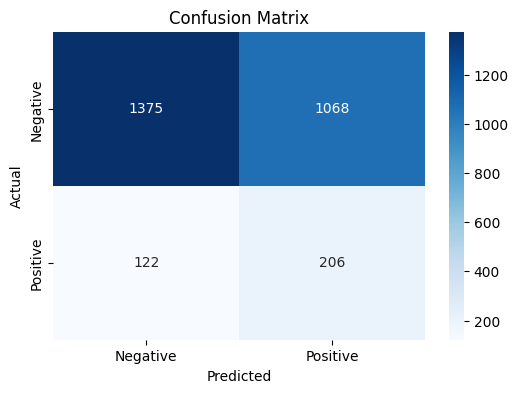

In [98]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred1 = pipeline.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [108]:
df['readmit_within_30'].value_counts()

readmit_within_30
0    12219
1     1635
Name: count, dtype: int64

In [110]:
from xgboost import XGBClassifier

pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', XGBClassifier(n_estimators = 100, objective = 'binary:logistic', scale_pos_weight = 99, max_delta_step = 1))
])

In [111]:
pipeline2.fit(X_train1,y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd',
                                                  CountVectorizerWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  CountVectorizerWrap...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

Accuracy: 0.7571
Precision: 0.1584
Recall: 0.2439
F1 Score: 0.1921


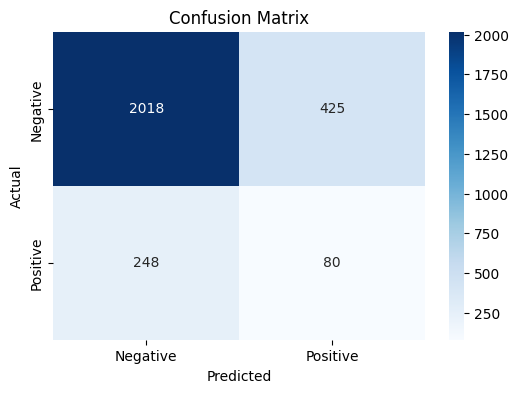

In [112]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred1 = pipeline2.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [122]:
from imblearn.ensemble import BalancedRandomForestClassifier

pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', BalancedRandomForestClassifier())
])

In [123]:
pipeline3.fit(X_train1,y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  ['drg_mortality']),
                                                 ('age', StandardScaler(),
                                                  ['age']),
                                                 ('procedure_pairs',
                                                  TfidfWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x325e46fc0>)),
                ('pca', PCA(n_components=100)),
                ('classifier', BalancedRandomForestClassifier())])

Accuracy: 0.7788
Precision: 0.2013
Recall: 0.2927
F1 Score: 0.2385


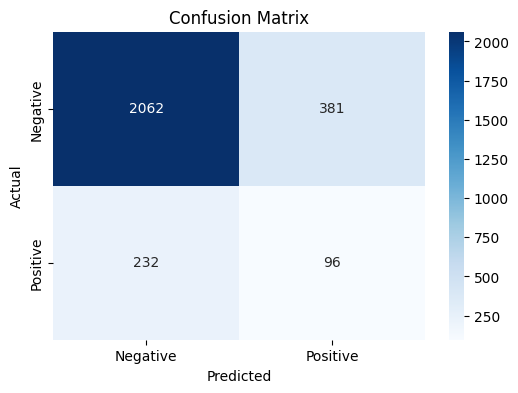

In [124]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred1 = pipeline3.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [61]:
# Treat imbalanced dataset for better results.
# check pipeline again and try to modify it

In [62]:
import joblib
#joblib.dump(pipeline, 'readmission_yes_no_pipeline.joblib')

<h3>Keeping only readmitted people</h3>

In [99]:

new_df = df[(df['days_to_readmit'].notnull())]

y2 = new_df['readmit_within_30']
x2 = new_df.drop(columns = ['days_to_readmit','readmit_within_30'])

In [127]:
x2.describe()

,drg_code,drg_severity,drg_mortality,age
count,4211.000000,4211.000000,4211.000000,4211.000000
mean,2080.797435,3.644740,3.487058,69.275232
std,2196.437658,0.554946,0.689942,11.918169
min,1.000000,1.000000,1.000000,20.000000
25%,454.000000,3.000000,3.000000,62.000000
50%,1653.000000,4.000000,4.000000,72.000000
75%,2414.000000,4.000000,4.000000,78.000000
max,9524.000000,4.000000,4.000000,110.000000


In [128]:
y2.value_counts()

readmit_within_30
0    2576
1    1635
Name: count, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.2)

In [66]:
pipeline2.fit(X_train2,y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

Accuracy: 0.6429
Precision: 0.5702
Recall: 0.4119
F1 Score: 0.4783


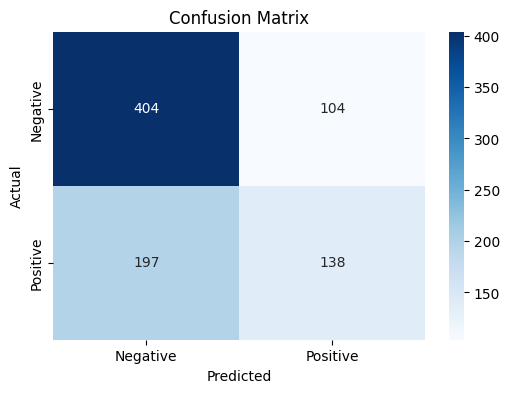

In [67]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred2 = pipeline2.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

In [106]:
pipeline3.fit(X_train2,y_train2)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd',
                                                  CountVectorizerWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  CountVectorizerWrap...
                                                 ('age', StandardScaler(),
                                                  ['age']),
                                                 ('procedure_pairs',
                                                  CountVectorizerWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events',
                                                  CountVectorizerWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x324a4bec0>)),
                ('pca', PCA(n_components=100)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

Accuracy: 0.6074
Precision: 0.4817
Recall: 0.4531
F1 Score: 0.4670


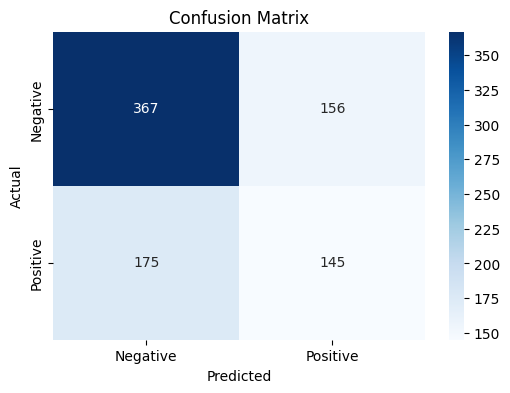

In [107]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred2 = pipeline3.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# model to predict num of days

In [68]:
# to predict number of days for patient who need readmission within 30 days

new_df = df[(df['days_to_readmit'].notnull()) & (df['readmit_within_30'] == 1)]

y2 = new_df['days_to_readmit']
x2 = new_df.drop(columns = ['days_to_readmit','readmit_within_30'])

In [69]:
y2.isna().sum()

0

In [70]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.2)

In [71]:
from sklearn.ensemble import RandomForestRegressor
pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor',  RandomForestRegressor())
])

In [72]:
pipeline2.fit(X_train2,y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['drg_severity']),
                                                 ('drg_mortality',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['drg_mortality']),
                                                 ('age', StandardScaler(),
                                                  ['age']),
                                                 ('procedure_pairs',
                                                  TfidfWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('regressor', RandomForestRegressor())])

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred2=pipeline2.predict(X_test2)

In [74]:
mae = mean_absolute_error(y_test2,y_pred2)
print('MAE: ',mae)
print("MSE",mean_squared_error (y_test2,y_pred2))
print ("RMSE", np. sqrt (mean_squared_error (y_test2,y_pred2) ))
r2=r2_score (y_test2, y_pred2)
print ("r2_score",r2 )

MAE:  7.7234418323139655
MSE 78.78116462649292
RMSE 8.875875428739011
r2_score -0.023870775257311738


In [75]:
import joblib
#joblib.dump(pipeline2, 'readmission_days.joblib')